In [2]:
import pandas as pd
import numpy as np
import math
from textblob import TextBlob as tb
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import neattext.functions as nfx
import emoji
import advertools as adv
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AYUSH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
august=pd.read_csv('AUGUSTFINALTWEET(RAW).csv')

In [4]:
august.columns

Index(['created_at', 'username', 'tweet', 'language', 'replies_count',
       'retweets_count', 'likes_count'],
      dtype='object')

In [5]:
august.shape

(3025, 7)

In [6]:
duplicates = august[august.duplicated()]
duplicates.shape

(354, 7)

In [7]:
august=august.drop_duplicates(keep='first')
august.shape

(2671, 7)

In [8]:
august['language'].unique()

array(['en', 'und', 'mr', 'ja', 'in', 'ar', 'et', 'ca', 'bn', 'hi', 'th',
       'ur', 'te', 'gu', 'fr', 'si', 'tl', 'ht', 'vi', 'pl', 'no', 'ru',
       'zh', 'tr', 'da', 'ro', 'es', 'ta', 'pt', 'kn', 'eu', 'it', 'fa',
       'de', 'or', 'pa', 'fi', 'lt', 'ml', 'nl'], dtype=object)

In [9]:
august['language'].value_counts()

en     1698
in      432
hi      144
und      94
tl       36
th       33
es       30
lt       26
ar       20
et       12
ca       12
it       10
ur       10
ja        9
de        9
fr        8
ta        8
si        7
bn        7
mr        7
gu        6
vi        5
kn        5
pl        4
te        4
fa        4
pt        3
or        3
nl        3
tr        3
zh        3
ht        3
ro        2
eu        2
da        2
fi        2
no        2
ru        1
pa        1
ml        1
Name: language, dtype: int64

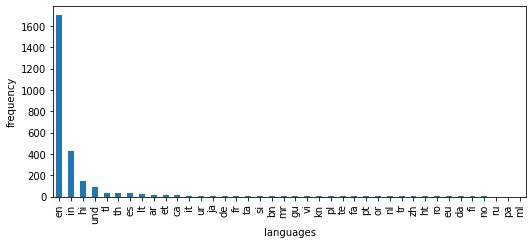

In [10]:
list1=np.array
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
list1=august['language'].value_counts().plot(ax=ax, kind='bar', xlabel='languages', ylabel='frequency')
plt.show()

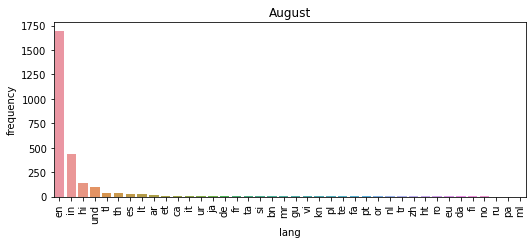

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 3.50]
lang=august['language'].value_counts().rename_axis('lang').reset_index(name='frequency')
ax = sns.barplot(x="lang", y="frequency", data=lang)
plt.title("August")
plt.xticks(rotation=90)
plt.show()

In [11]:
lang.shape

(40, 2)

In [12]:
for i in august['language']:
    index_names = august[august['language']!='en' ].index
    august.drop(index_names, inplace = True)

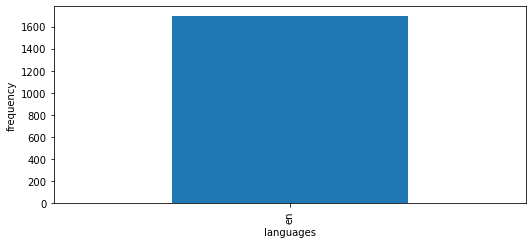

In [13]:
list1=np.array
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
list1=august['language'].value_counts().plot(ax=ax, kind='bar', xlabel='languages', ylabel='frequency')
plt.show()

In [14]:
august.shape

(1698, 7)

In [15]:
august

,created_at,username,tweet,language,replies_count,retweets_count,likes_count
0,2021-08-01 08:56:28 India Standard Time,ravi4354,Line of Treatment for Covid-19 Hydroquinone I...,en,0.0,1.0,2.0
1,2021-08-09 06:29:13 India Standard Time,aditidasnigam,"Yes, it's Oxygen and Remdesivir Versus Hindu-M...",en,1.0,11.0,22.0
2,2021-08-07 11:46:13 India Standard Time,drpriyankavija1,@KDMCOfficial one of my pts needs remdesivir a...,en,0.0,0.0,0.0
3,2021-08-06 13:54:00 India Standard Time,adityanag2002,So many citizens across India requested you fo...,en,0.0,0.0,1.0
4,2021-08-05 16:39:11 India Standard Time,sanhchaupham,Remdesivir “made in India” just reached #HoChi...,en,6.0,17.0,110.0
...,...,...,...,...,...,...,...
2958,2021-08-03T04:38:06.000Z,Rajesh,I thought things would go back to normal by th...,en,2.0,NaN,7.0
2959,2021-08-02T10:40:34.000Z,Srishti Clinic,𝓣𝓸 𝓽𝓪𝓴𝓮 𝓸𝓻 𝓷𝓸𝓽 𝓽𝓸 𝓽𝓪𝓴𝓮 - the Covid - 19 vac...,en,NaN,NaN,1.0
2960,2021-08-01T18:05:29.000Z,Sandip,US Top COVID-19 Advisor Says No New Lockdowns ...,en,NaN,NaN,NaN
2961,2021-08-01T12:31:20.000Z,The Era,"""How COVID-19 vaccines are being prioritized a...",en,NaN,NaN,NaN


In [16]:
august[['replies_count','retweets_count', 'likes_count']]=august[['replies_count','retweets_count', 'likes_count']].fillna(0)

In [17]:
august

,created_at,username,tweet,language,replies_count,retweets_count,likes_count
0,2021-08-01 08:56:28 India Standard Time,ravi4354,Line of Treatment for Covid-19 Hydroquinone I...,en,0.0,1.0,2.0
1,2021-08-09 06:29:13 India Standard Time,aditidasnigam,"Yes, it's Oxygen and Remdesivir Versus Hindu-M...",en,1.0,11.0,22.0
2,2021-08-07 11:46:13 India Standard Time,drpriyankavija1,@KDMCOfficial one of my pts needs remdesivir a...,en,0.0,0.0,0.0
3,2021-08-06 13:54:00 India Standard Time,adityanag2002,So many citizens across India requested you fo...,en,0.0,0.0,1.0
4,2021-08-05 16:39:11 India Standard Time,sanhchaupham,Remdesivir “made in India” just reached #HoChi...,en,6.0,17.0,110.0
...,...,...,...,...,...,...,...
2958,2021-08-03T04:38:06.000Z,Rajesh,I thought things would go back to normal by th...,en,2.0,0.0,7.0
2959,2021-08-02T10:40:34.000Z,Srishti Clinic,𝓣𝓸 𝓽𝓪𝓴𝓮 𝓸𝓻 𝓷𝓸𝓽 𝓽𝓸 𝓽𝓪𝓴𝓮 - the Covid - 19 vac...,en,0.0,0.0,1.0
2960,2021-08-01T18:05:29.000Z,Sandip,US Top COVID-19 Advisor Says No New Lockdowns ...,en,0.0,0.0,0.0
2961,2021-08-01T12:31:20.000Z,The Era,"""How COVID-19 vaccines are being prioritized a...",en,0.0,0.0,0.0


In [18]:
AugustTweet=august[['tweet','language']]

In [19]:
AugustTweet

,tweet,language
0,Line of Treatment for Covid-19 Hydroquinone I...,en
1,"Yes, it's Oxygen and Remdesivir Versus Hindu-M...",en
2,@KDMCOfficial one of my pts needs remdesivir a...,en
3,So many citizens across India requested you fo...,en
4,Remdesivir “made in India” just reached #HoChi...,en
...,...,...
2958,I thought things would go back to normal by th...,en
2959,𝓣𝓸 𝓽𝓪𝓴𝓮 𝓸𝓻 𝓷𝓸𝓽 𝓽𝓸 𝓽𝓪𝓴𝓮 - the Covid - 19 vac...,en
2960,US Top COVID-19 Advisor Says No New Lockdowns ...,en
2961,"""How COVID-19 vaccines are being prioritized a...",en


In [20]:
AugustTweet=AugustTweet.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

In [21]:
AugustTweet.drop(['index'],axis=1,inplace=True)

In [22]:
AugustTweet

,tweet,language
0,Line of Treatment for Covid-19 Hydroquinone I...,en
1,"Yes, it's Oxygen and Remdesivir Versus Hindu-M...",en
2,@KDMCOfficial one of my pts needs remdesivir a...,en
3,So many citizens across India requested you fo...,en
4,Remdesivir “made in India” just reached #HoChi...,en
...,...,...
1693,I thought things would go back to normal by th...,en
1694,𝓣𝓸 𝓽𝓪𝓴𝓮 𝓸𝓻 𝓷𝓸𝓽 𝓽𝓸 𝓽𝓪𝓴𝓮 - the Covid - 19 vac...,en
1695,US Top COVID-19 Advisor Says No New Lockdowns ...,en
1696,"""How COVID-19 vaccines are being prioritized a...",en


In [23]:
AugustTweet.to_csv("AugustTweet.csv")

### -----Extract Hastags-----

In [24]:
AugustTweet['hastags']=np.nan

In [25]:
def extract_hastags(text,i=0):
    hashtag_list = []
    for word in text.split():
        if word[0] == '#':
            hashtag_list.append(word[0:])
    AugustTweet['hastags'][i]=hashtag_list

In [26]:
index=AugustTweet.index
print(index)

RangeIndex(start=0, stop=1698, step=1)


In [29]:
AugustTweet['tweet'][33]

'The many facets of cutaneous manifestations of #COVID19 #medtwitter #dermtwitter #SARSCoV2 #Sars_Cov_2 #skin #hairfall #Corona'

In [30]:
extract_hastags(AugustTweet['tweet'][33],33)

<ipython-input-25-9982ec90058f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AugustTweet['hastags'][i]=hashtag_list


In [31]:
AugustTweet['hastags'][33]

['#COVID19',
 '#medtwitter',
 '#dermtwitter',
 '#SARSCoV2',
 '#Sars_Cov_2',
 '#skin',
 '#hairfall',
 '#Corona']

In [32]:
for i in range(0,1698):
    text=AugustTweet['tweet'][i]
    extract_hastags(text,i)

In [33]:
AugustTweet['hastags']

0                                                      []
1                                                      []
2                                                      []
3                                                      []
4                                        [#HoChiMinhCity]
                              ...                        
1693                                                   []
1694    [#gynaehealth, #Bangladesh, #WestBengal, #ivf,...
1695                                                   []
1696                                                   []
1697                                                   []
Name: hastags, Length: 1698, dtype: object

### ----Extract @userHandles----

In [44]:
AugustTweet['attherate']=np.nan

In [45]:
def extract_at_the_rate(text,i=0):
    list1= []
    for word in text.split():
        if word[0] == '@':
            list1.append(word[0:])
    AugustTweet['attherate'][i]=list1

In [46]:
extract_at_the_rate(AugustTweet['tweet'][10],10)

<ipython-input-45-3e79cb50275a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AugustTweet['attherate'][i]=list1
C:\Users\AYUSH\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [47]:
for i in range(0,1698):
    text=AugustTweet['tweet'][i]
    extract_at_the_rate(text,i)

In [48]:
AugustTweet['attherate']

0                           []
1                           []
2              [@KDMCOfficial]
3                           []
4                           []
                 ...          
1693                        []
1694                        []
1695                        []
1696                        []
1697    [@ICC, @cricketturkey]
Name: attherate, Length: 1698, dtype: object

In [49]:
AugustTweet.to_csv('AugustTweet.csv')

### ----Extracting URLs----

In [50]:
AugustTweet['urls']=np.nan

In [51]:
def extract_urls(text,i=0):
    attherate_list = []
    for word in text.split():
        if word[0:5] == 'https':
            attherate_list.append(word[0:])
    AugustTweet['urls'][i]=attherate_list

In [52]:
AugustTweet['tweet'][4]

'Remdesivir “made in India” just reached #HoChiMinhCity to help flight Covid 19.  https://t.co/nbaFUWscbw'

In [53]:

extract_urls(AugustTweet['tweet'][4],4 )

<ipython-input-51-1785e1e5001c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AugustTweet['urls'][i]=attherate_list
C:\Users\AYUSH\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [54]:
for i in range(0,1698):
    text=AugustTweet['tweet'][i]
    extract_urls(text,i)

In [55]:
AugustTweet['urls']

0                              []
1                              []
2                              []
3                              []
4       [https://t.co/nbaFUWscbw]
                  ...            
1693                           []
1694                           []
1695                           []
1696                           []
1697                           []
Name: urls, Length: 1698, dtype: object

In [57]:
AugustTweet.to_csv('AugustTweet.csv')

In [58]:
AugustTweet['tokenized_Tweet']=np.nan

In [59]:
def tokenizing(text,i=0):
    text=tb(text)
    token_text=text.words
    token_text
    AugustTweet['tokenized_Tweet'][i]=token_text

In [60]:
tokenizing(AugustTweet['tweet'][0],0)

<ipython-input-59-6816798d0f9c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AugustTweet['tokenized_Tweet'][i]=token_text
C:\Users\AYUSH\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [61]:
AugustTweet['tokenized_Tweet'][0]

WordList(['Line', 'of', 'Treatment', 'for', 'Covid-19', 'Hydroquinone', 'Ivermectin', 'Zincovit', 'Celine', 'Vit.C', 'Paracetamol', 'Doxy', 'Antibody', 'cocktail', 'Dexamethasone', 'Azithromycin', 'Remdesivir', 'Frapivir', 'Oxygen', 'Get', 'vaccinated', 'prevent', 'all', 'above'])

In [62]:
for i in range(0,1698):
    text=AugustTweet['tweet'][i]
    tokenizing(text,i)

In [63]:
AugustTweet['tokenized_Tweet']

0       [Line, of, Treatment, for, Covid-19, Hydroquin...
1       [Yes, it, 's, Oxygen, and, Remdesivir, Versus,...
2       [KDMCOfficial, one, of, my, pts, needs, remdes...
3       [So, many, citizens, across, India, requested,...
4       [Remdesivir, “, made, in, India, ”, just, reac...
                              ...                        
1693    [I, thought, things, would, go, back, to, norm...
1694    [𝓣𝓸, 𝓽𝓪𝓴𝓮, 𝓸𝓻, 𝓷𝓸𝓽, 𝓽𝓸, 𝓽𝓪𝓴𝓮, the, Covid, 19, ...
1695    [US, Top, COVID-19, Advisor, Says, No, New, Lo...
1696    [How, COVID-19, vaccines, are, being, prioriti...
1697    [Updated, schedule, announced, by, ICC, as, cr...
Name: tokenized_Tweet, Length: 1698, dtype: object

In [64]:
AugustTweet.to_csv('AugustTweet.csv')

### ----Removing Stop Words----

In [65]:
AugustTweet['filteredToken']=np.nan

In [66]:
text_set=set(AugustTweet['tokenized_Tweet'][0])
stop_set=set(stopwords.words("english"))
AugustTweet['filteredToken'][0]=list(text_set-stop_set)

<ipython-input-66-e4d083aa73d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AugustTweet['filteredToken'][0]=list(text_set-stop_set)
C:\Users\AYUSH\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [68]:
stop_set=set(stopwords.words("english"))
for i in range(0,1698):
    text_set=set(AugustTweet['tokenized_Tweet'][i])
    AugustTweet['filteredToken'][i]=list(text_set-stop_set)

In [69]:
AugustTweet

,tweet,language,hastags,attherate,urls,tokenized_Tweet,filteredToken
0,Line of Treatment for Covid-19 Hydroquinone I...,en,[],[],[],"[Line, of, Treatment, for, Covid-19, Hydroquin...","[Treatment, Oxygen, Get, vaccinated, Antibody,..."
1,"Yes, it's Oxygen and Remdesivir Versus Hindu-M...",en,[],[],[],"[Yes, it, 's, Oxygen, and, Remdesivir, Versus,...","[Oxygen, 's, long, Hindu-Muslim, Hospital, mig..."
2,@KDMCOfficial one of my pts needs remdesivir a...,en,[],[@KDMCOfficial],[],"[KDMCOfficial, one, of, my, pts, needs, remdes...","[contact, urgently, kdmc, one, remdesivir, plz..."
3,So many citizens across India requested you fo...,en,[],[],[],"[So, many, citizens, across, India, requested,...","[across, oxygen, India, So, remember, amp, man..."
4,Remdesivir “made in India” just reached #HoChi...,en,[#HoChiMinhCity],[],[https://t.co/nbaFUWscbw],"[Remdesivir, “, made, in, India, ”, just, reac...","[t.co/nbaFUWscbw, India, reached, “, ”, flight..."
...,...,...,...,...,...,...,...
1693,I thought things would go back to normal by th...,en,[],[],[],"[I, thought, things, would, go, back, to, norm...","[end, I, would, things, naive, thought, back, ..."
1694,𝓣𝓸 𝓽𝓪𝓴𝓮 𝓸𝓻 𝓷𝓸𝓽 𝓽𝓸 𝓽𝓪𝓴𝓮 - the Covid - 19 vac...,en,"[#gynaehealth, #Bangladesh, #WestBengal, #ivf,...",[],[],"[𝓣𝓸, 𝓽𝓪𝓴𝓮, 𝓸𝓻, 𝓷𝓸𝓽, 𝓽𝓸, 𝓽𝓪𝓴𝓮, the, Covid, 19, ...","[Kolkata, 03340664321, Behind, Bangladesh, 𝓸𝓻,..."
1695,US Top COVID-19 Advisor Says No New Lockdowns ...,en,[],[],[],"[US, Top, COVID-19, Advisor, Says, No, New, Lo...","[Expected, Surge, Says, Advisor, New, Delta, U..."
1696,"""How COVID-19 vaccines are being prioritized a...",en,[],[],[],"[How, COVID-19, vaccines, are, being, prioriti...","[How, vaccines, COVID-19, distributed, priorit..."


In [70]:
AugustTweet.to_csv('AugustTweet_(with Emojis and other language within eng sentence).csv')